# 1. Data Preparation:

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = r'C:\Users\muzza\Downloads\Data'

In [2]:
target_size = (64, 64) 
batch_size = 32 

rotation_range = 40  
width_shift_range = 0.2  
height_shift_range = 0.2  
shear_range = 0.2  
zoom_range = 0.2 
horizontal_flip = True  
brightness_range = [0.8,1.2]  

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=horizontal_flip,
    brightness_range=brightness_range,
    validation_split=0.2  
)


train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',  
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


# CNN 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5)) 

model.add(Dense(4, activation='softmax'))

model.summary()


c:\Users\muzza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,293,060 (16.38 MB)

 Trainable params: 4,291,588 (16.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

This code defines a convolutional neural network (CNN) using the Keras Sequential API in TensorFlow. 

Starting to build our neural network model. Imagine this as setting up the blueprint for a house we want to build.
Adding Layers:

Convolutional Layers (Conv2D):

These layers are like filters that look at small pieces of the image to find important patterns, like edges or textures.
Imagine looking at a small part of a puzzle to find out if it's a corner piece or a piece with a straight edge.
Pooling Layer (MaxPooling2D):

After each Convolutional layer, we shrink down the image to focus on the most important parts.
Think of this like zooming out on a photo to see the bigger picture.

Flatten Layer:

This layer takes all the information we found in the previous layers and puts it in a straight line.
It's like flattening a stack of papers into a single sheet.

Dense Layers (Dense):

These layers are fully connected, meaning each neuron is connected to every neuron in the previous layer.
Imagine this like having a conversation where everyone in the room talks to everyone else.
Batch Normalization and Dropout:

Batch normalization helps keep the training process stable by adjusting the values passing through the network.
Dropout randomly drops out some connections during training to prevent the model from relying too much on any one piece of information.

Model Summary:

This gives us a summary of our model, showing how many layers we have, the size of each layer, and how many parameters (or adjustable parts) our model has in total.
In simpler terms, we're building a system that looks at different parts of images to understand what they contain, then learns how to make predictions based on that information. It's like teaching a computer to recognize objects in pictures by breaking them down into smaller parts and analyzing them, then putting all that information together to make a guess.








# combile the model

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Training the Model

In [5]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10, 
    callbacks=[tensorboard_callback]
)


Epoch 1/10


c:\Users\muzza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 104s 883ms/step - accuracy: 0.4520 - loss: 1.5011 - val_accuracy: 0.2775 - val_loss: 1.4850
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 406ms/step - accuracy: 0.5925 - loss: 0.9904 - val_accuracy: 0.2962 - val_loss: 1.5760
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 391ms/step - accuracy: 0.6378 - loss: 0.8576 - val_accuracy: 0.2837 - val_loss: 1.5409
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 573ms/step - accuracy: 0.6574 - loss: 0.8093 - val_accuracy: 0.4338 - val_loss: 1.4786
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 543ms/step - accuracy: 0.6616 - loss: 0.7974 - val_accuracy: 0.5188 - val_loss: 1.2703
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 406ms/step - accuracy: 0.7009 - loss: 0.7242 - val_accuracy: 0.6338 - val_loss: 0.8359
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 456ms/step - accuracy: 0.7057 - loss: 0.7178 - val_accuracy: 0.5550 - val_loss: 1.0639
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 417ms/step - accuracy: 0.7163 - loss: 0.6881 - va

# Visualiz

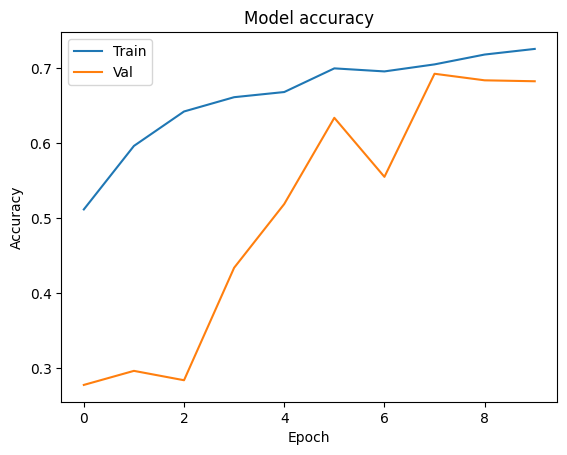

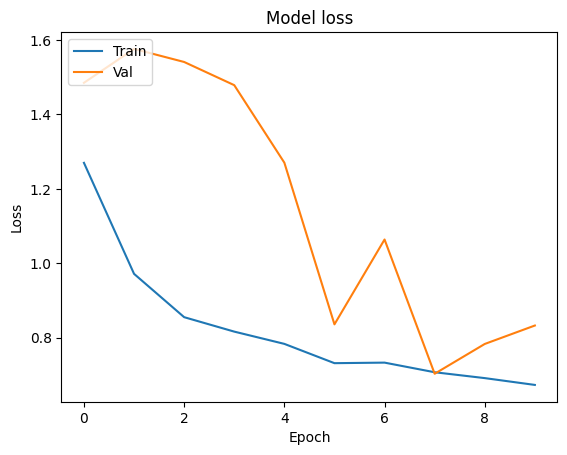

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step


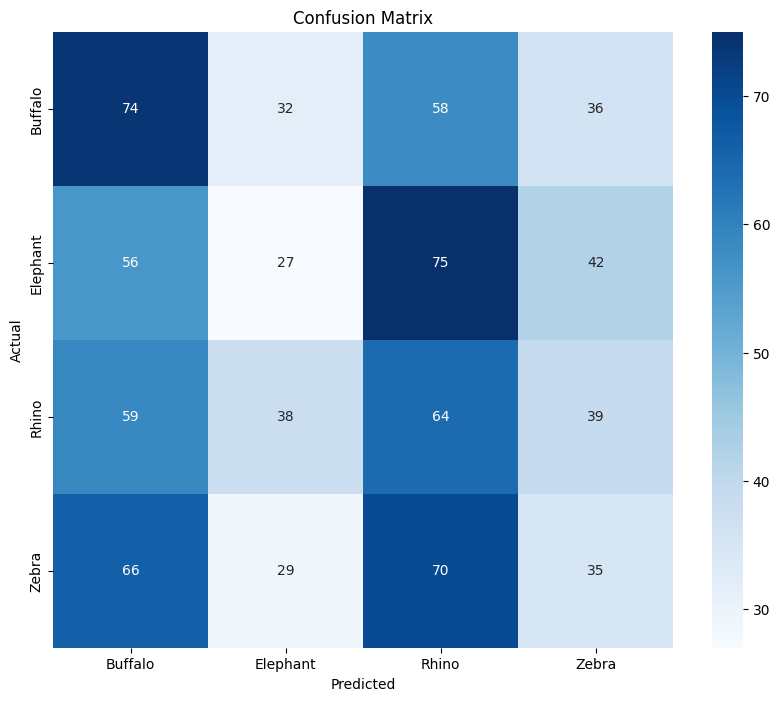

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

validation_generator.reset()  
predictions = model.predict(validation_generator, steps=len(validation_generator))
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices, yticklabels=validation_generator.class_indices)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
